### <font color = 'purple'> Predicting Student Success with Data

Regional schools can benefit from using multiple linear regression modeling to predict students' academic performance. 
    
The model was trained on a [dataset](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) analyzing factors like study hours, previous scores, sleep patterns, and practice materials. 

By inputting a new student's values for these variables, this technique can accurately estimate their future performance index. This data-driven approach provides insights to identify strengths, areas for improvement, and enable personalized academic support strategies.

Understanding key influencers like sleep and practice allows guidance on effective study habits. Implementing this predictive modeling empowers educators to optimize student outcomes and ensure every learner reaches their full potential through tailored resources and interventions.

<img src ="./Images\pexels-photo-267586.webp" alt="Image" style="width: 100%">

### **<font color='purple'> Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings("ignore")

### **<font color='purple'> Import Dataset**

In [12]:
df = pd.read_csv(r'./Student_Performance.csv')

In [ ]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91
1,4,82,4,2,65
2,8,51,7,2,45
3,5,52,5,2,36
4,7,75,8,5,66


### **<font color='purple'> Exploratory Data Analysis of the variables**

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Sleep Hours                       10000 non-null  int64
 3   Sample Question Papers Practiced  10000 non-null  int64
 4   Performance Index                 10000 non-null  int64
dtypes: int64(5)
memory usage: 390.8 KB


<font color = 'green'> *The above indicates there are no non-values in the dataset.The dataset is clean and good to go*

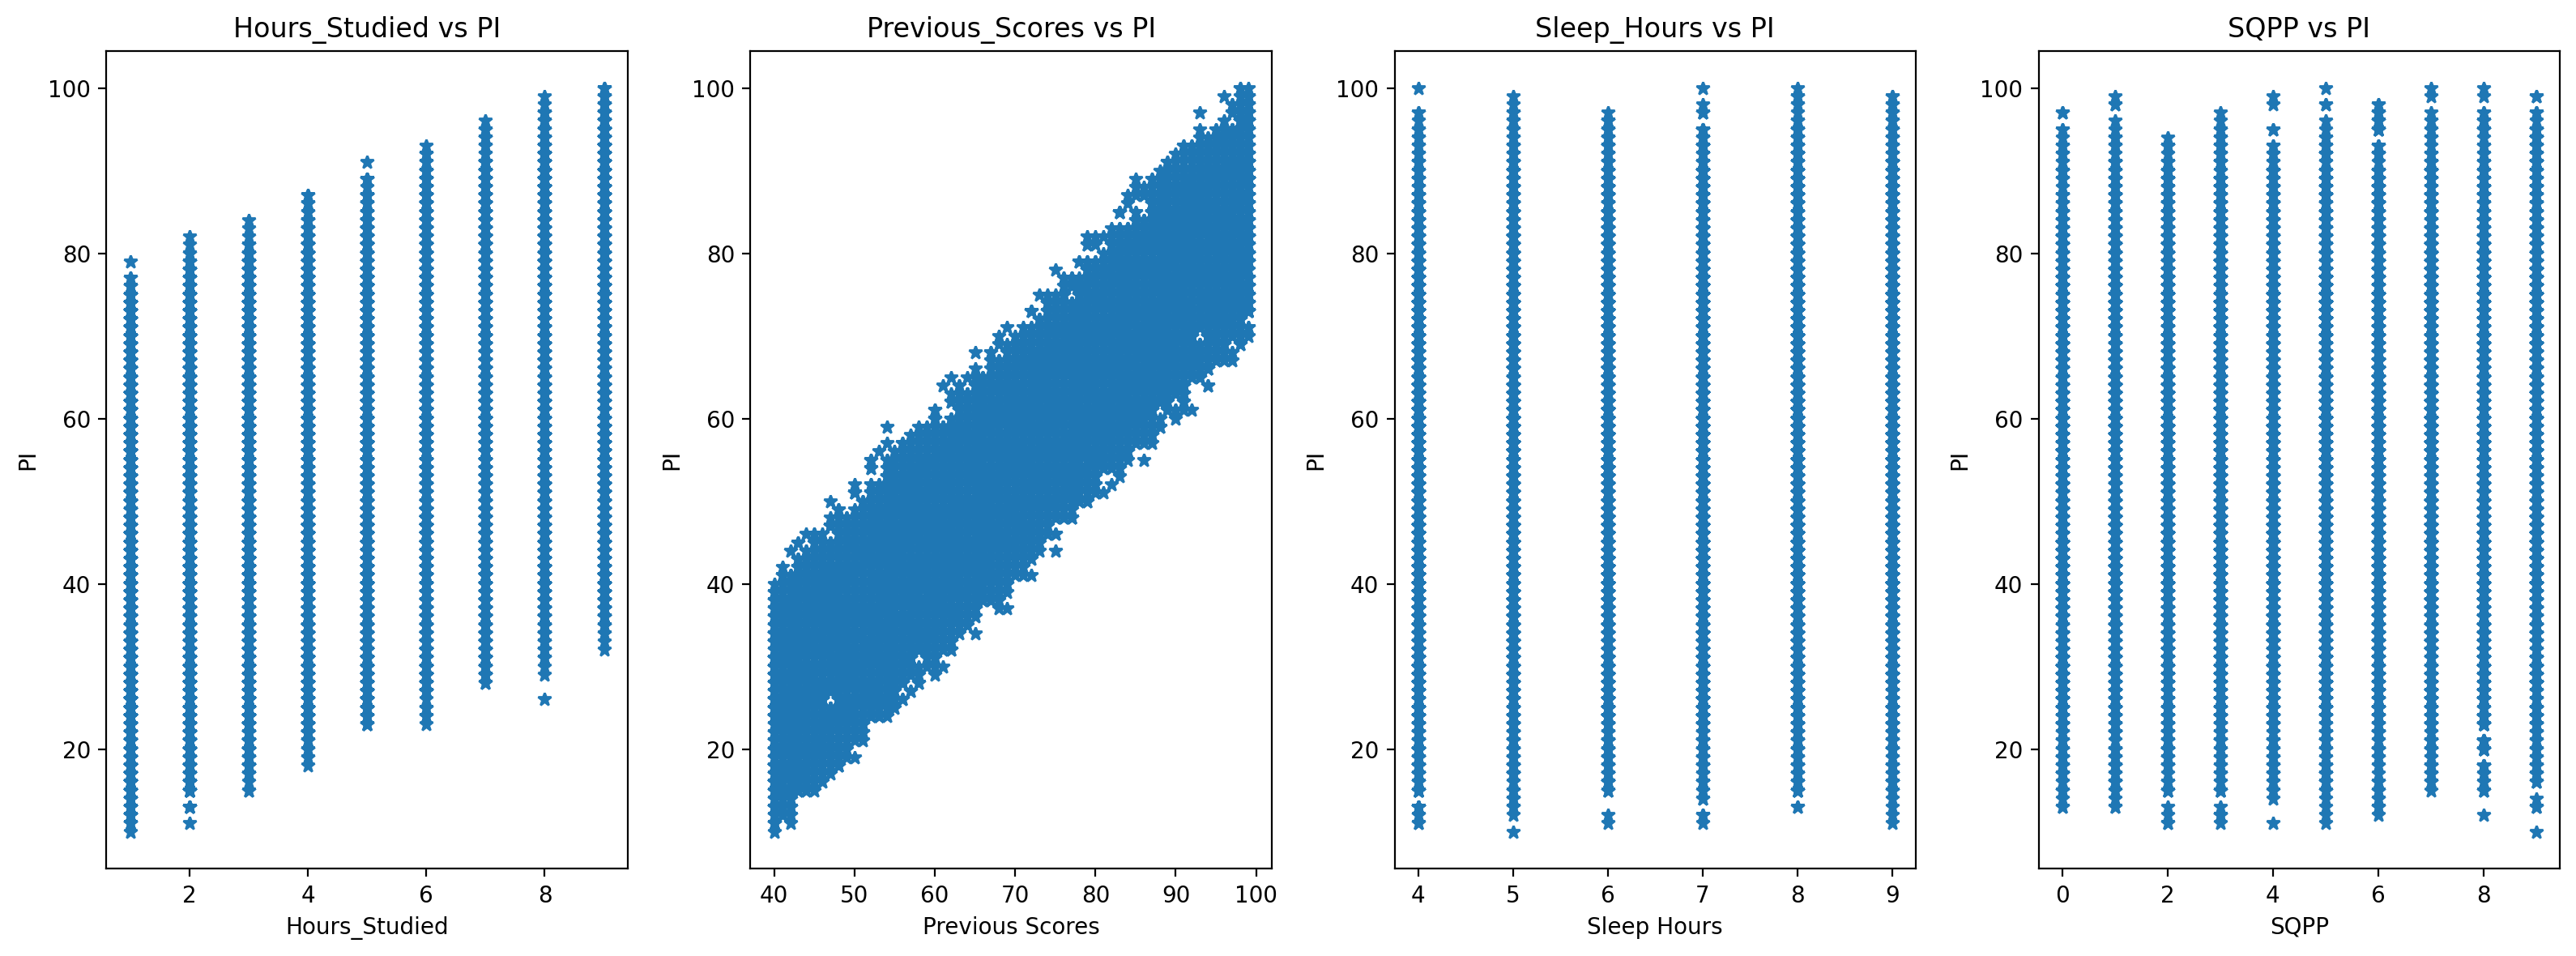

In [223]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,6), dpi=200)

axes[0].plot(df['Hours Studied'], df['Performance Index'], '*')
axes[0].set_xlabel('Hours_Studied')
axes[0].set_ylabel('PI')
axes[0].set_title('Hours_Studied vs PI')

axes[1].plot(df['Previous Scores'], df['Performance Index'], '*')
axes[1].set_xlabel('Previous Scores')
axes[1].set_ylabel('PI')
axes[1].set_title('Previous_Scores vs PI')

axes[2].plot(df['Sleep Hours'], df['Performance Index'], '*')
axes[2].set_xlabel('Sleep Hours')
axes[2].set_ylabel('PI')
axes[2].set_title('Sleep_Hours vs PI')

axes[3].plot(df['Sample Question Papers Practiced'], df['Performance Index'], '*')
axes[3].set_xlabel('SQPP')
axes[3].set_ylabel('PI')
axes[3].set_title('SQPP vs PI')

plt.tight_layout()
plt.show()

### **<font color='purple'> Define X and y**
    
- X: Independent Variables/Features
- y: Dependent Variable/Label

In [153]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

# X = df.drop('Performance Index', axis=1)
# y = df['Performance Index']

In [154]:
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [155]:
y

0       91
1       65
2       45
3       36
4       66
        ..
9995    23
9996    58
9997    74
9998    95
9999    64
Name: Performance Index, Length: 10000, dtype: int64

### **<font color='purple'> Split the dataset into the training and test data**

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

### <font color = 'purple'> **Data Dimension**
    
*To confirm our data-split is accurate*

In [225]:
X_train.shape

# 70%

(7000, 4)

In [224]:
X_test.shape

# 30%

(3000, 4)

### **<font color='purple'> Train the model on the training dataset**

In [160]:
from sklearn.linear_model import LinearRegression

In [226]:
model=LinearRegression()

# Initialize

In [227]:
model.fit(X_train, y_train)

# Fit the model on just the training dataset

LinearRegression()

### **<font color='purple'> Predict the test set results**

In [228]:
y_pred = model.predict(X_test)
y_pred

# Use the test dataset to confirm the accuracy of our model on unseen datasets

array([69.50276122, 75.82645818, 19.13523647, ..., 36.19194308,
       45.15619236, 25.29913227])

**Testing the model using random variables from the dataset**

- The model has only been ntrained with the train dataset.

In [255]:
model.predict([[7, 99, 9, 1]])

array([91.50982722])

The variables above are iloc[0] on our df dataset. The true result was 91; our model predicted 92

In [256]:
df.iloc[0]

Hours Studied                        7
Previous Scores                     99
Sleep Hours                          9
Sample Question Papers Practiced     1
Performance Index                   91
Name: 0, dtype: int64

In [257]:
model.predict([[8, 51, 7, 2]])

array([44.71423446])

The variables entered into the model above are iloc[2] on our df dataset. 

The true result was 45; our model predicted 45

In [258]:
df.iloc[2]

Hours Studied                        8
Previous Scores                     51
Sleep Hours                          7
Sample Question Papers Practiced     2
Performance Index                   45
Name: 2, dtype: int64

### **<font color='purple'> Evaluate the performance of the model**

**To undertand how well our data performed on the trained data**

In [259]:
model.score(X_train, y_train)

# The closer it is to 1, the higher the confidence of the model on the trained data

0.9884661508860678

**To undertand how well our data performed on the test data and subsequently unseen data**

In [167]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [234]:
r2_score(y_test, y_pred)

# Our R2 score, close to 1, suggests that the model explains about 98.86% of the variability in the response data-
# around the mean.

0.9885527901627791

**To check the error between the predicted and actual values**

In [169]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
rmse, mae

(2.0479101992962976, 1.6100769078300072)

**To assess the distribution and pattern of the residuals**

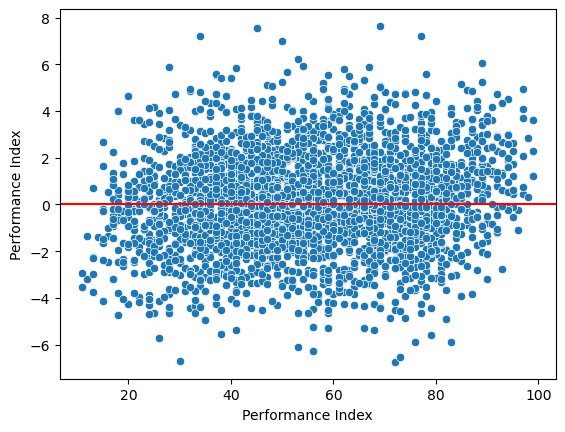

In [190]:
residuals = y_test-y_pred

sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red')
plt.show()


**From the scatter plot above:**
- The data points are spread out evenly around the zero line, suggesting heteroskedasticity. This indicates that there is no clear pattern or trend between the difference between the actual Performance Index (PI) scores and the predicted PI scores- as the residuals are well-dispersed.
- Since the residual plot does not exhibit homoskedasticity, there is no immediate need to investigate further into the dataset or the model used.
- The heavy density of data points suggests that we have a large dataset.

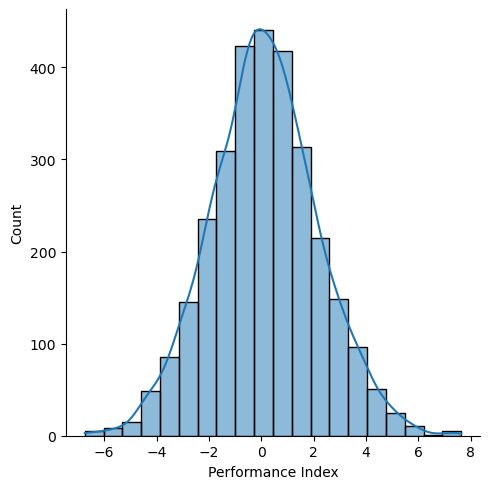

In [171]:
sns.displot(residuals, bins=20, kde=True)
plt.show()

**From the image above:**
- Our KDE is uniformly distributed and peferctly seated around 0; indicating our model is unbiased and there are no systematic errors

### **<font color='purple'> Predicted Values**

####  **<font color='purple'> Plot the results**

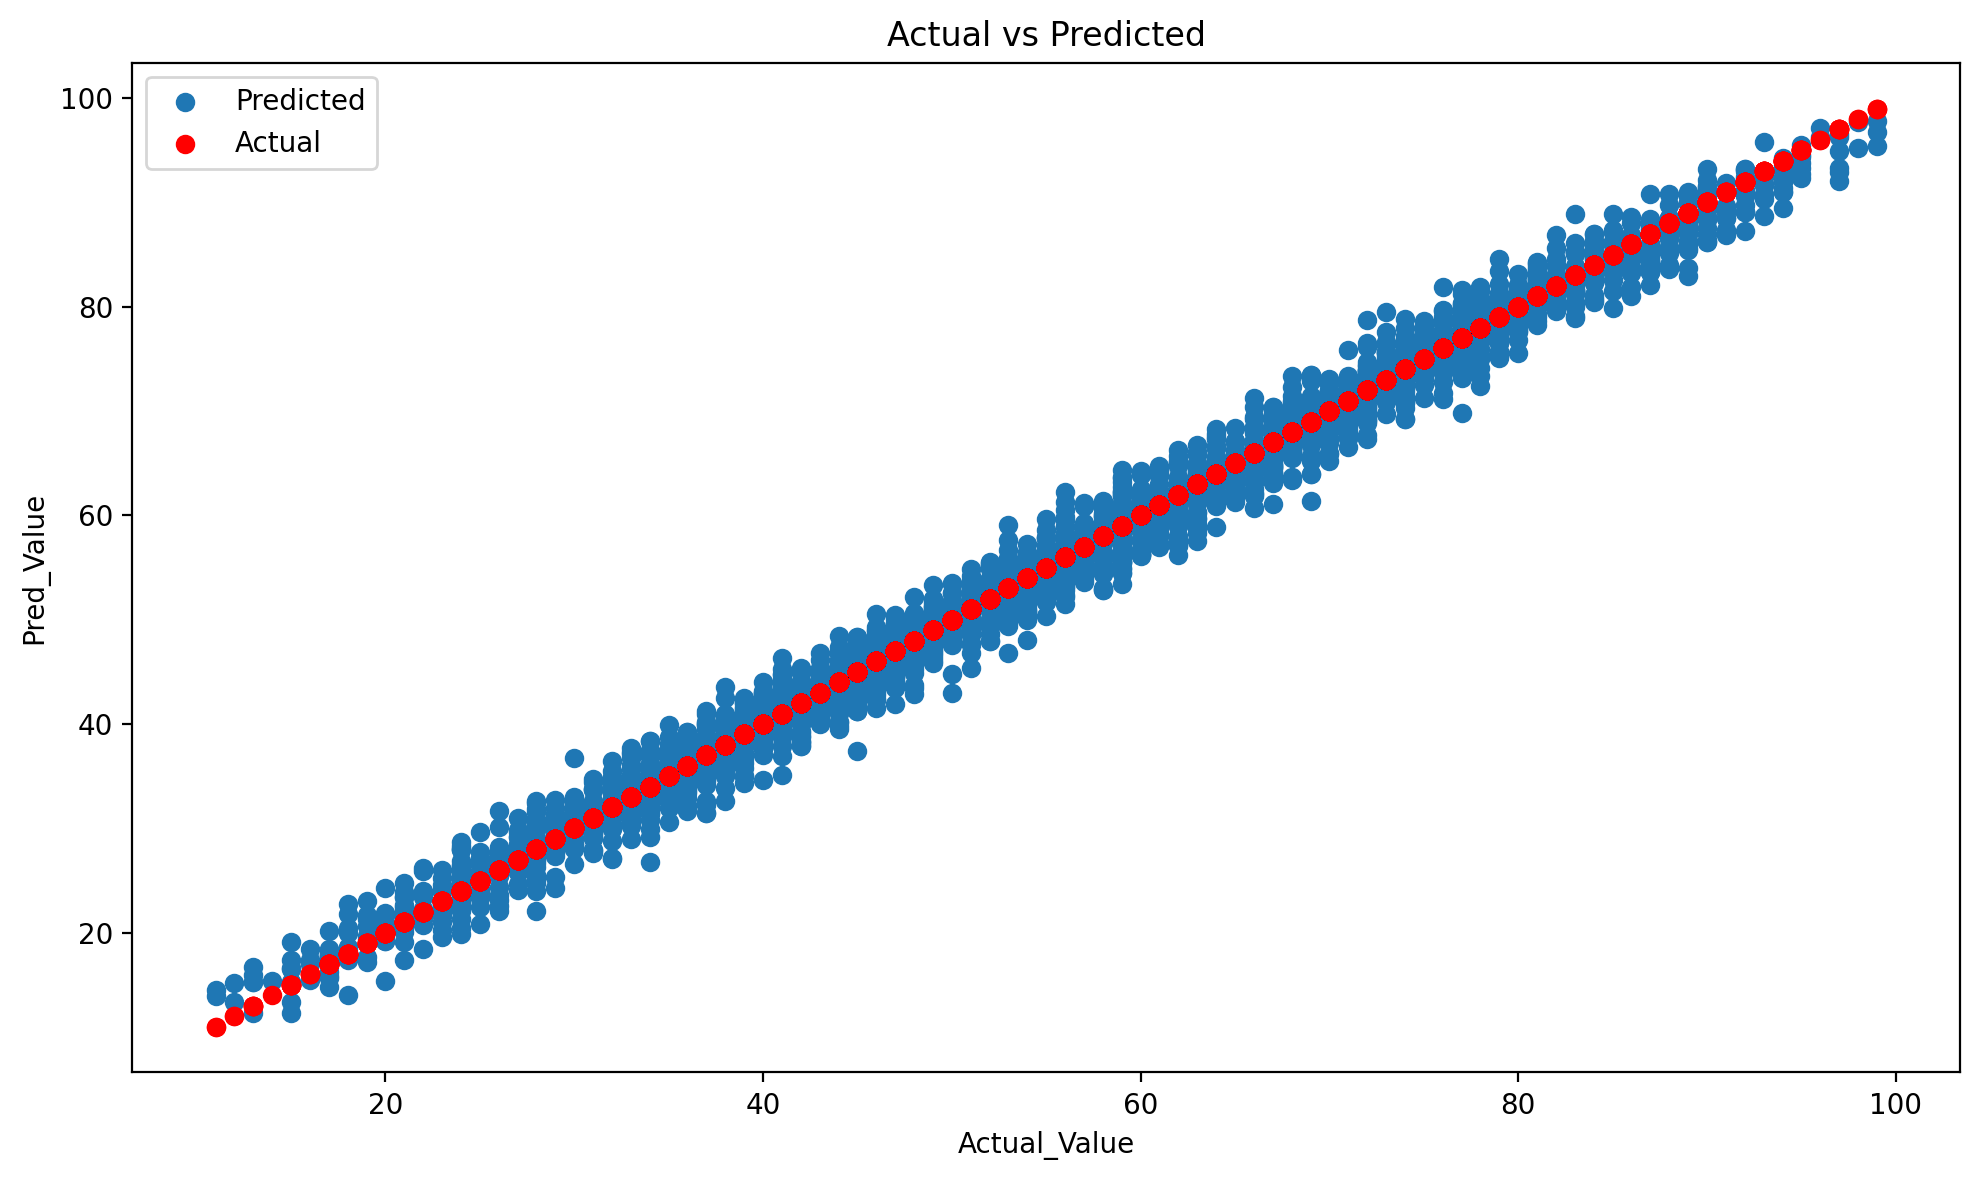

In [249]:
plt.figure(figsize=(10, 6), dpi=200)

plt.scatter(y_test, y_pred, label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual') 
plt.xlabel('Actual_Value')
plt.ylabel('Pred_Value')
plt.title('Actual vs Predicted')

plt.tight_layout()
plt.legend()
plt.show()

In [173]:
pred_y = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred, 'Residuals': y_test-y_pred})
pred_y[:20]

,Actual Value,Predicted Value,Residuals
2037,67,69.502761,-2.502761
1764,76,75.826458,0.173542
6690,21,19.135236,1.864764
8443,72,70.193806,1.806194
2090,65,64.660580,0.339420
3826,43,41.432476,1.567524
7451,78,78.144212,-0.144212
7089,49,49.967590,-0.967590
2460,44,43.302612,0.697388
2675,54,54.031211,-0.031211


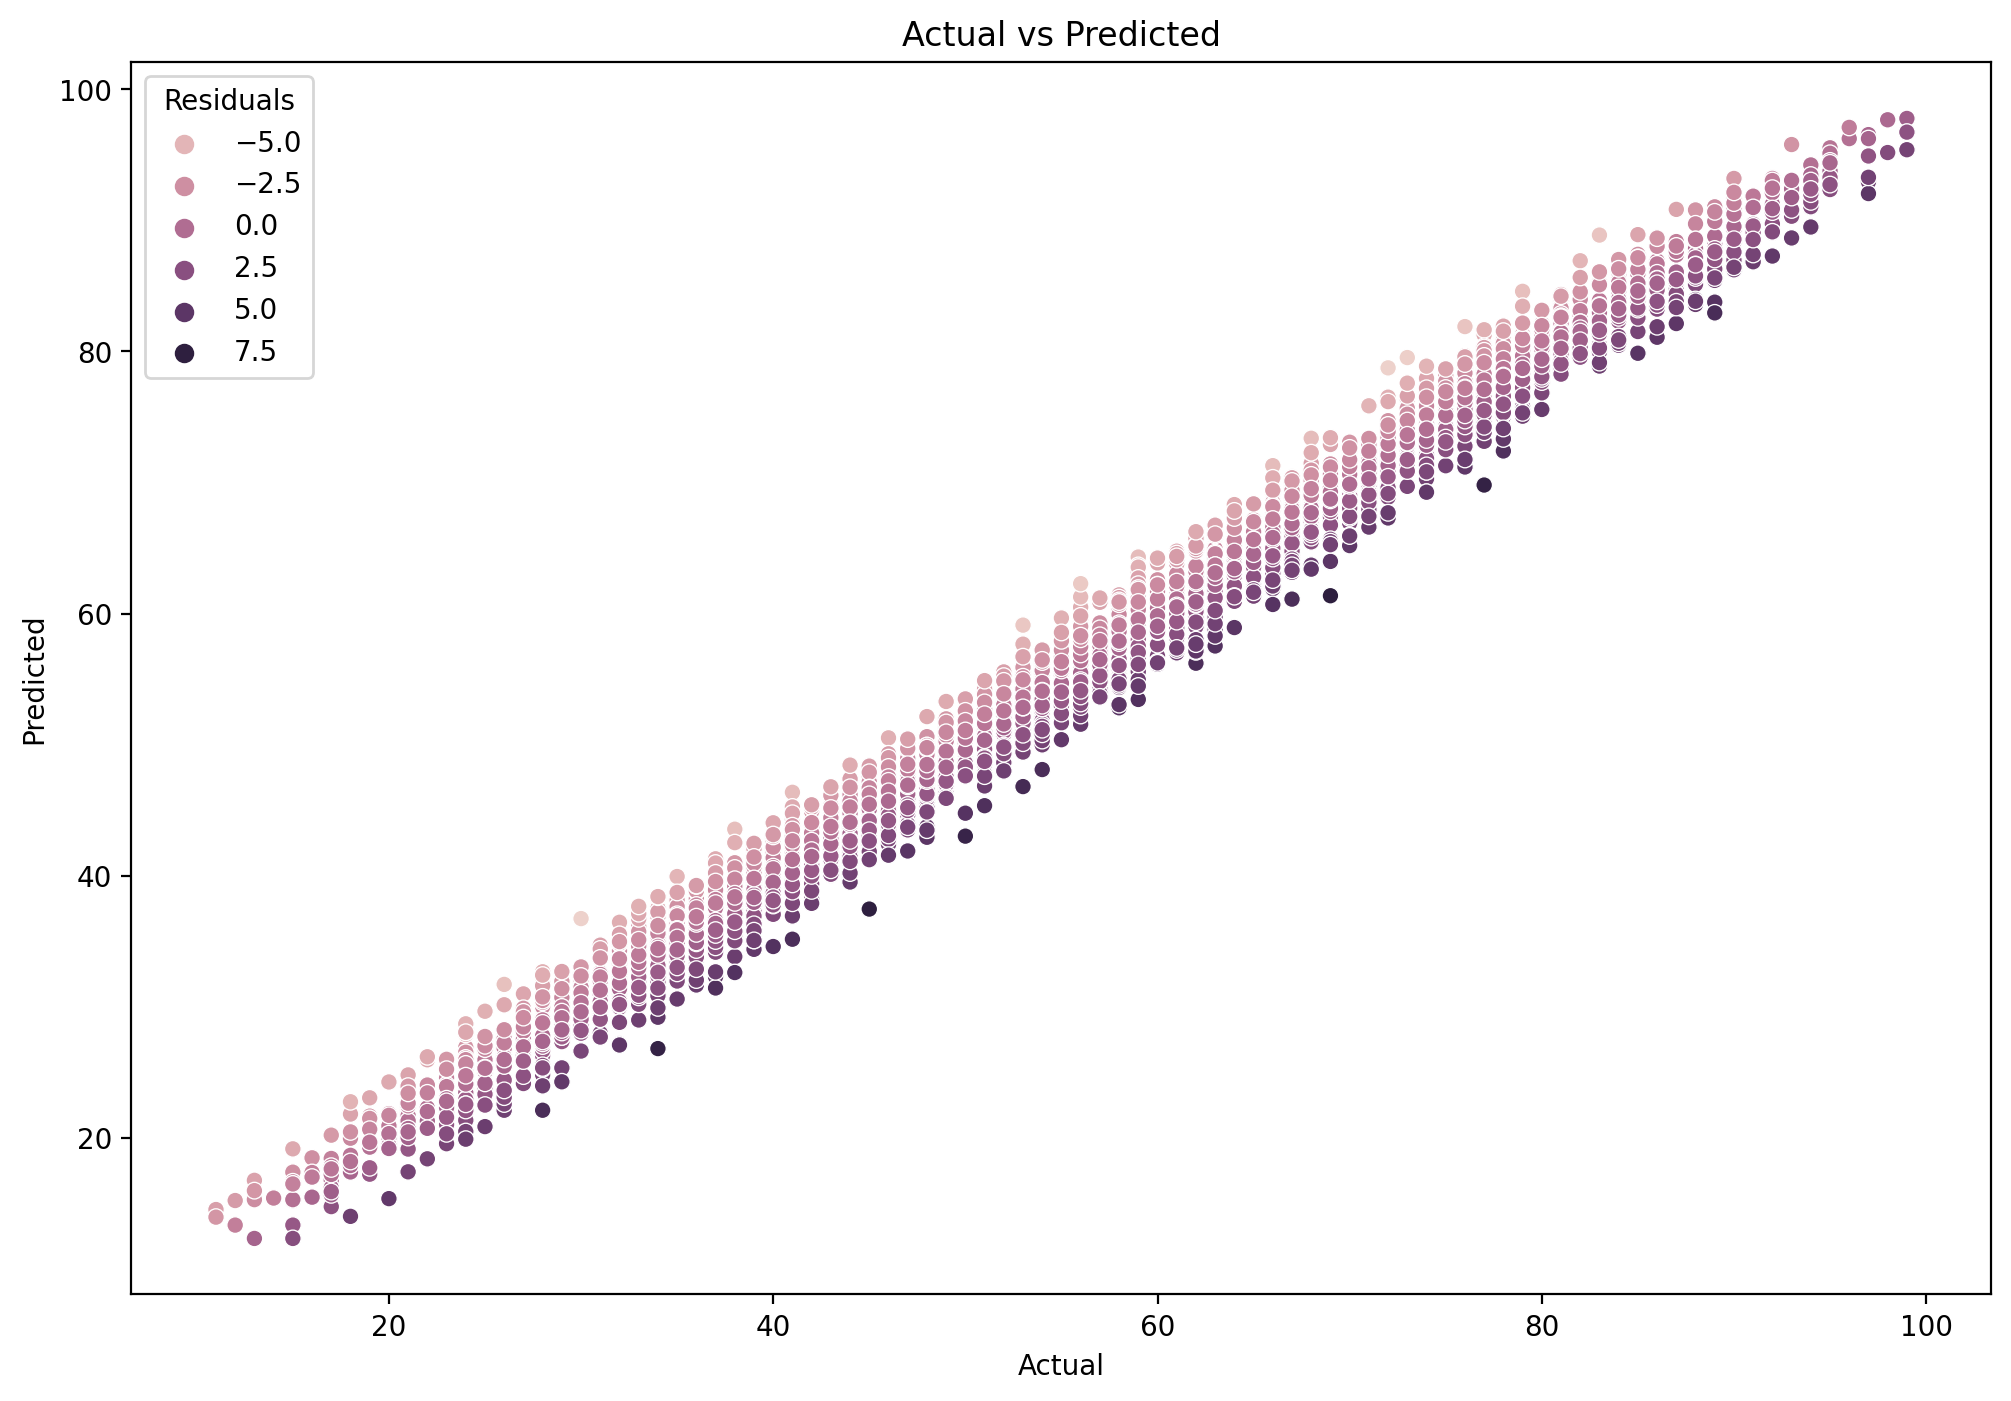

In [176]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='Actual Value', y='Predicted Value',data=pred_y, hue='Residuals')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

### <font color='purple'> **Generate the equation of the model from**           
  
y = mx+b (m = coeffieicient, b = intercept, x = independent vaiables (the scores, y = the predicted variable (performance index))
    

In [177]:
model.coef_

#  the slope

array([2.84997792, 1.01825357, 0.47899306, 0.1885866 ])

In [178]:
model.intercept_

# the intercept

-33.74664539750688

### <font color='purple'> **Predicting with our model**
    

Predict the performance index of a student whose:

- Hours Studied: 10
- Previous Scores: 70
- Sleep Hours: 8
- Sample Question Papers Practiced: 8

In [179]:
perf_index = 2.84997792*10+ 1.01825357*70+ 0.47899306*8+ 0.1885866*8 + -33.74664539750688

perf_index

71.37152098249312

### <font color = 'purple'> Final Model & Model Deployment

In [264]:
final_model = LinearRegression()

In [265]:
final_model.fit(X, y)

LinearRegression()

- Fitting the model on X and y (in this instance) compare how each input variable (like study hours, sleep, etc.) relates to both the actual performance scores vs the scores predicted by the model. This is to check the overall performance of the model on the features and the true values

In [266]:
y_pre = final_model.predict(X)

**Ensuring the data dimension between the y_pre and the true y values are the same**

In [270]:
len(y_pre)

10000

In [271]:
len(df['Performance Index'])

10000

**The Comparison Plot**

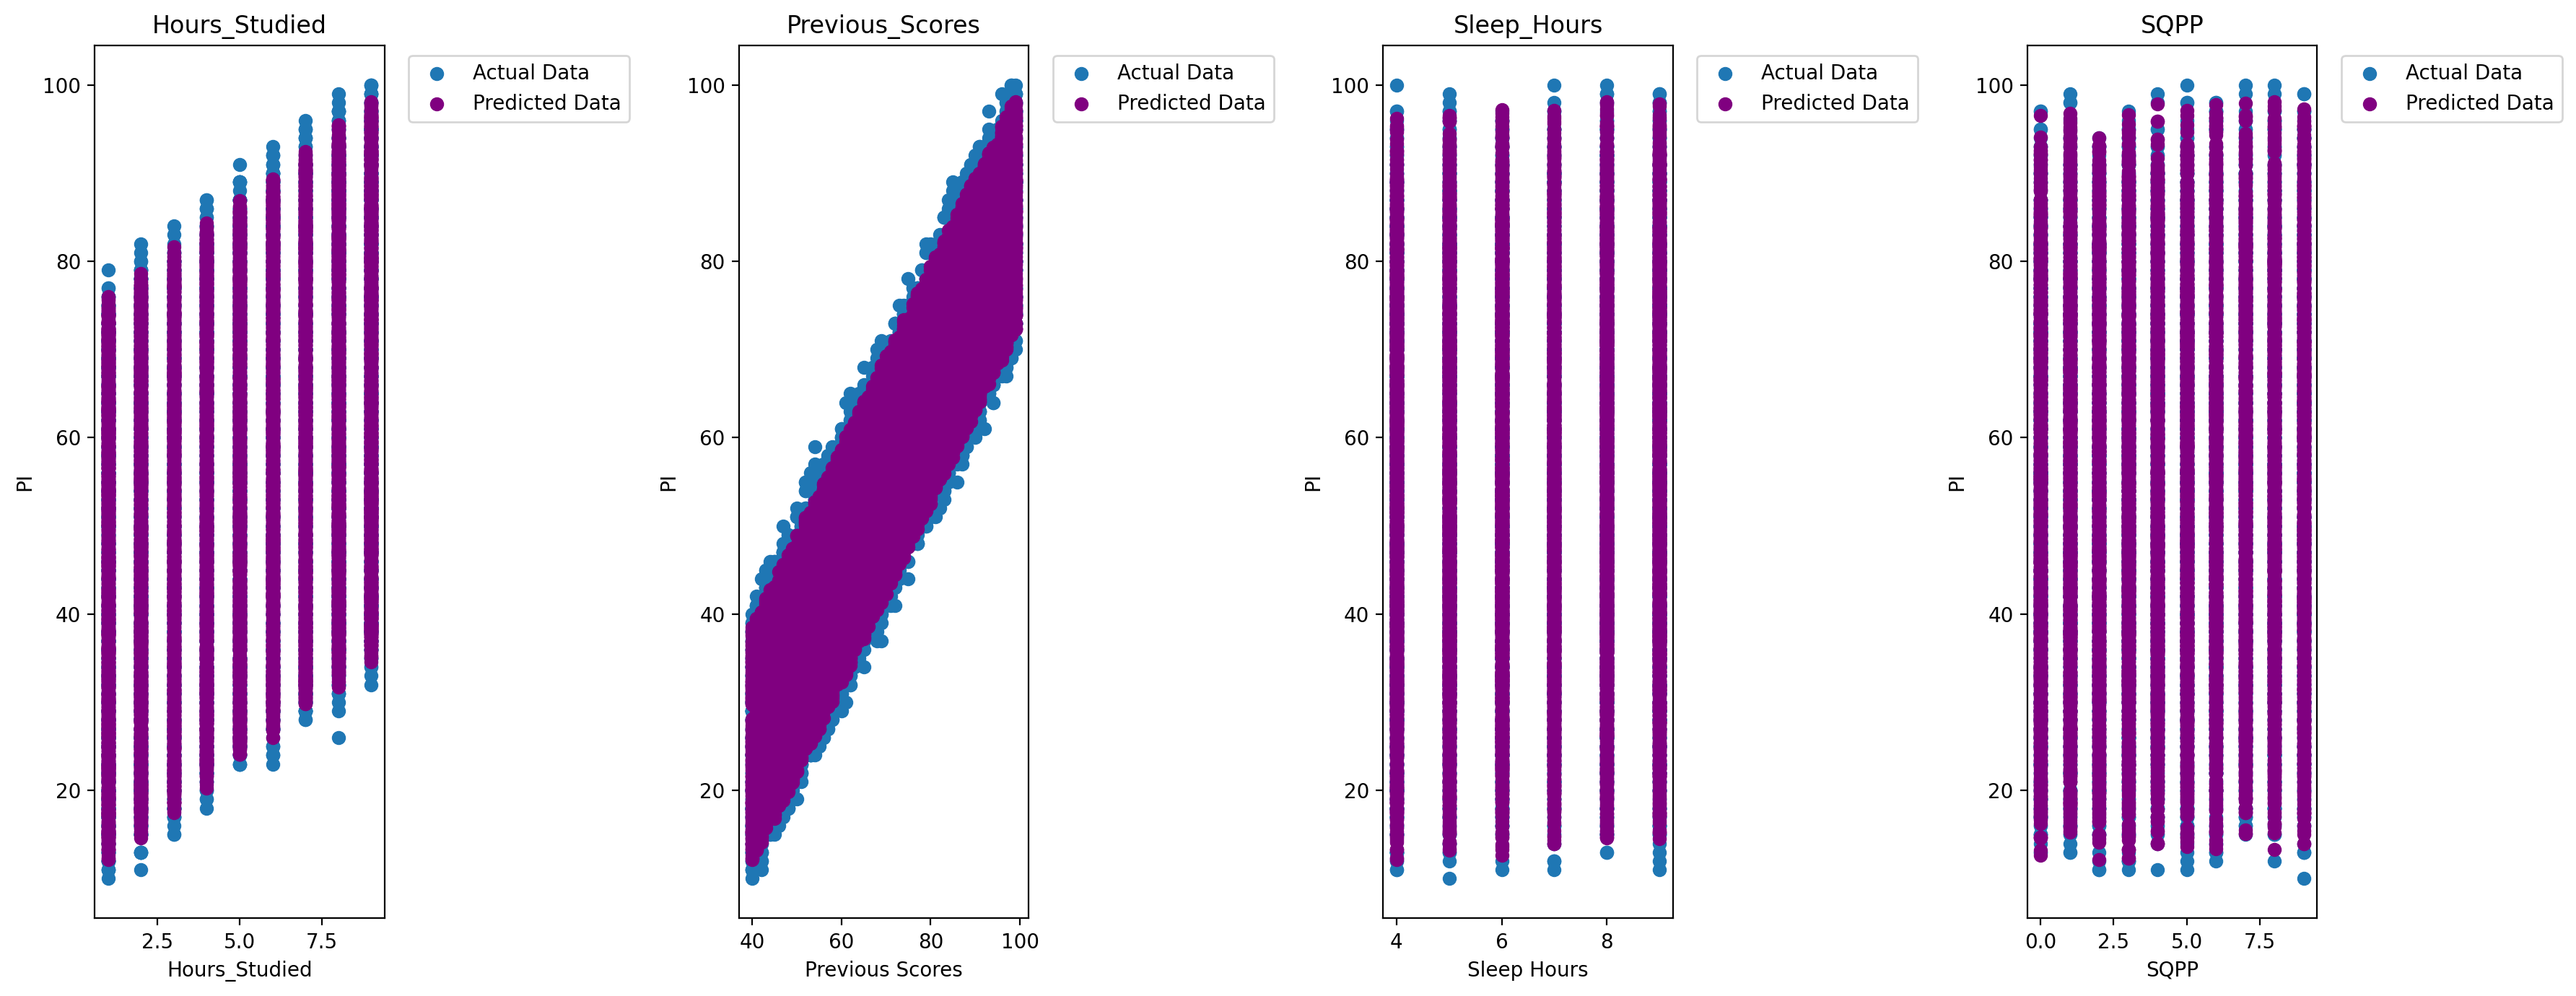

In [278]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,7), dpi=200)

axes[0].scatter(df['Hours Studied'], df['Performance Index'], marker='o', label='Actual Data')
axes[0].scatter(df['Hours Studied'], y_pre, marker='o', color='purple', label='Predicted Data')
axes[0].set_xlabel('Hours_Studied')
axes[0].set_ylabel('PI')
axes[0].set_title('Hours_Studied')
axes[0].legend(bbox_to_anchor=(1.05, 1))

axes[1].scatter(df['Previous Scores'], df['Performance Index'], marker='o', label='Actual Data')
axes[1].scatter(df['Previous Scores'], y_pre, marker='o', color='purple', label='Predicted Data')
axes[1].set_xlabel('Previous Scores')
axes[1].set_ylabel('PI')
axes[1].set_title('Previous_Scores')
axes[1].legend(bbox_to_anchor=(1.05, 1))

axes[2].scatter(df['Sleep Hours'], df['Performance Index'], marker='o', label='Actual Data')
axes[2].scatter(df['Sleep Hours'], y_pre, marker='o', color='purple', label='Predicted Data')
axes[2].set_xlabel('Sleep Hours')
axes[2].set_ylabel('PI')
axes[2].set_title('Sleep_Hours')
axes[2].legend(bbox_to_anchor=(1.05, 1))

axes[3].scatter(df['Sample Question Papers Practiced'], df['Performance Index'], marker='o', label='Actual Data')
axes[3].scatter(df['Sample Question Papers Practiced'], y_pre, marker='o', color='purple', label='Predicted Data')
axes[3].set_xlabel('SQPP')
axes[3].set_ylabel('PI')
axes[3].set_title('SQPP')
axes[3].legend(bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


From the above:
- The graph shows our predictions (in red) are close with the true values (in blue)
- Hours of study has a positive relationship with the performance index and has the highest impact on the model (Averaging 63%)
- Previous Scores have a positive relationship with the performance index and has the second largest impact on the model (Averaging 11%)
- Although the relationship between sleep and PI is positive, the impact on the overall model is low (averaging 11%)
- Similarly, the relationship between practice materials and PI is positive, the impact is the lowest (averaging 4%)

In [186]:
from joblib import dump, load

In [187]:
dump(final_model, 'final_PI_model.joblib')

['final_PI_model.joblib']

In [188]:
loaded_model = load('final_PI_model.joblib')

In [274]:
loaded_model.coef_
# The Coef from the fit on X_train are not far from those of X and y: array([2.84997792, 1.01825357, 0.47899306, 0.1885866 ])

array([2.85342921, 1.01858354, 0.47633298, 0.1951983 ])

### <font color = 'purple'> Conclusion


<img src ="./Images\pexels-pixabay-267885.jpg" alt="Image" style="width: 100%">

The regression analysis revealed study hours as the most influential factor (63%) in predicting student performance, followed by previous scores (22%), sleep duration (11%), and practice materials (4%). This ordering highlights priority areas for facilitating academic excellence.

Based on these findings, schools should emphasize dedicated study time initiatives, such as enforced library or study hall periods before the end of the school day. Moreover, educating parents on ensuring adequate study hours and sleep hygiene is paramount. [Research]((https://www.med.upenn.edu/csi/the-impact-of-sleep-on-learning-and-memory.html)  shows students with sufficient sleep have improved retention and memory consolidation, as sleep allows the brain to effectively process learned information.

By implementing policies and programs focusing on the top predictive factors in this identified order of impact, schools can cultivate an environment optimized for maximizing student performance and increasing the likelihood of academic achievement.